# Clonning the Dataset

In [282]:
!git clone --depth 1 https://github.com/cctech-labs/challenges

Cloning into 'challenges'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 0), reused 18 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


# **Importing the Libraries**

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics  import r2_score


import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,classification_report

In [318]:
%cd '/content/challenges/2020/06/hiring/resources/data_science/'
df=pd.read_csv('challenge2_dataset.csv')
df.head(20)

/content/challenges/2020/06/hiring/resources/data_science


,Unnamed: 0,1,2,3,Target
0,0,0.60,0.31,13.0,False
1,1,0.74,0.33,21.0,False
2,2,0.54,0.19,NaN,True
3,3,0.46,NaN,9.0,False
4,4,0.77,0.15,15.0,True
5,5,0.46,0.17,18.0,False
6,6,0.49,0.26,10.0,False
7,7,0.40,0.12,19.0,True
8,8,0.77,0.17,13.0,True
9,9,0.69,0.28,14.0,False


# **Data_Exploaration**

To know the mean,max,count like values of the dataset

In [319]:
df.describe()

,Unnamed: 0,1,2,3
count,1995.000000,1992.000000,1992.000000,1993.000000
mean,997.000000,1.488800,1.741546,16.333166
std,576.051213,22.145983,58.456685,42.407440
min,0.000000,0.400000,0.100000,0.000000
25%,498.500000,0.490000,0.150000,12.000000
50%,997.000000,0.600000,0.220000,15.000000
75%,1495.500000,0.710000,0.300000,19.000000
max,1994.000000,600.000000,2600.000000,1900.000000


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1995 non-null   int64  
 1   1           1992 non-null   float64
 2   2           1992 non-null   float64
 3   3           1993 non-null   float64
 4   Target      1984 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 78.1+ KB


*It is having 1 integer,3 float and  1 object variable(so, we need to encode it before feeding to our model)*

Checking null values

In [321]:
df.isnull().sum()

Unnamed: 0     0
1              3
2              3
3              2
Target        11
dtype: int64

***Adjusting the missing data***

*by replacing the it with mean and ffill*

In [322]:
df=df.rename(columns={'Unnamed: 0':'unnamed'})
df['1'].fillna(df['1'].mean(),inplace=True)
df['2'].fillna(df['2'].mean(),inplace=True)
df['3'].fillna(df['3'].mean(),inplace=True)
df.Target.fillna(method='ffill')

0       False
1       False
2        True
3       False
4        True
        ...  
1990    False
1991     True
1992    False
1993    False
1994    False
Name: Target, Length: 1995, dtype: bool

Splitting the dataset into dependant and independant variable i.e. X and y 

In [323]:
X=df.iloc[:,:-1]
y=df['Target']

**Correlation Analysis**


*It shows the correlation of one variable to all other variables*


1.   Greater the correlation,more it will related to other variable.
2.   We can discard the feature having more correlation.
3.   variable with it obviously have 1 correlation.


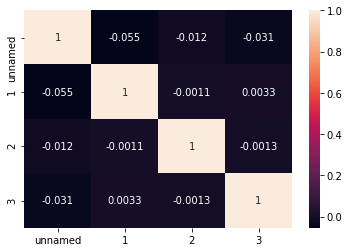

In [324]:
sns.heatmap(df.corr(),annot=True)

there's not much of correlation between the variables so we can't discard any of them

In [325]:
X.shape

(1995, 4)

# Feature Scaling

*Feature Scaling is a technique to standardize the independent features present in the data in a fixed range*

It protect the feature having small range bt great impact on model from feature having big range

In [326]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
X

array([[-1.73118283, -0.04017399, -0.02451359, -0.07865778],
       [-1.72944644, -0.03384596, -0.02417112,  0.11013036],
       [-1.72771005, -0.04288601, -0.02656846,  0.        ],
       ...,
       [ 1.72771005, -0.03746198, -0.02571226, -0.03146074],
       [ 1.72944644, -0.04650203, -0.02536979, -0.12585482],
       [ 1.73118283, -0.04514602, -0.02605474, -0.14945333]])

# Handling categorical data

Machine only can understand the numbers(i.e. numerical data)

In order to convert categorical data we can use some techniques such as label Encoding, Onehot Encoding, dummy variables etc.

**Label encoding** is simply converting each value in a column to a number.
for example: 




*   True ->1
*   False->0



In [327]:
from sklearn.preprocessing import LabelEncoder
enc_y=LabelEncoder()
y=enc_y.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

# Splitting the data into train test set

In [328]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [329]:

xgb=XGBClassifier(base_score=0.5,max_depth=3,n_estimators=100,random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [330]:
'''from sklearn.linear_model import SGDClassifier

cf=SGDClassifier(penalty='l2',loss='hinge',max_iter=100)
cf.fit(X_train,y_train)'''

"from sklearn.linear_model import SGDClassifier\n\ncf=SGDClassifier(penalty='l2',loss='hinge',max_iter=100)\ncf.fit(X_train,y_train)"

In [331]:
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

# Evalution Of Model

**Confusion metrics**

It is a matrix of real values and predicted values.
It is collection of True positive,True Negative,False Postive and False negative

In [332]:

print("Train Confusion metrics:\n",confusion_matrix(y_train,y_train_pred))

Train Confusion metrics:
 [[1089    2    0]
 [   8  289    0]
 [   5    0    3]]


In [333]:
print("Train Confusion metrics:\n",confusion_matrix(y_test,y_test_pred))

Train Confusion metrics:
 [[463   9   0]
 [ 10 114   0]
 [  3   0   0]]


**f1_Score**

In [334]:
f1_score(y_train,y_train_pred,average='micro')

0.9892550143266475

**Classification Report**

In [335]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1091
           1       0.99      0.97      0.98       297
           2       1.00      0.38      0.55         8

    accuracy                           0.99      1396
   macro avg       0.99      0.78      0.84      1396
weighted avg       0.99      0.99      0.99      1396



In [336]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       472
           1       0.93      0.92      0.92       124
           2       0.00      0.00      0.00         3

    accuracy                           0.96       599
   macro avg       0.63      0.63      0.63       599
weighted avg       0.96      0.96      0.96       599



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Importing prediction dataset

In [337]:
%cd '/content/challenges/2020/06/hiring/resources/data_science'
data=pd.read_csv('challenge2_prediction.csv')

/content/challenges/2020/06/hiring/resources/data_science


In [338]:
data.head()

,Unnamed: 0,1,2,3
0,1995,0.74,0.21,22.0
1,1996,0.43,0.15,14.0
2,1997,0.77,0.10,15.0
3,1998,0.57,0.31,15.0
4,1999,0.80,0.31,20.0


In [339]:
data.isnull().sum()

Unnamed: 0    0
1             4
2             5
3             4
dtype: int64

In [340]:
data=data.rename(columns={'Unnamed: 0':'unnamed'})
data['1'].fillna(data['1'].mean(),inplace=True)
data['2'].fillna(data['2'].mean(),inplace=True)
data['3'].fillna(data['3'].mean(),inplace=True)
data.head()

,unnamed,1,2,3
0,1995,0.74,0.21,22.0
1,1996,0.43,0.15,14.0
2,1997,0.77,0.10,15.0
3,1998,0.57,0.31,15.0
4,1999,0.80,0.31,20.0


In [341]:
data.shape

(855, 4)

In [342]:

sc_X=StandardScaler()
data=sc_X.fit_transform(data)
data

array([[-1.7300262 , -0.04363223, -0.03493221, -0.02806464],
       [-1.72597462, -0.05488647, -0.03585623, -0.03918754],
       [-1.72192303, -0.04254311, -0.03662624, -0.03779718],
       ...,
       [ 1.72192303, -0.05270823, -0.0341622 , -0.03501645],
       [ 1.72597462, -0.04762567, -0.03339218, -0.03918754],
       [ 1.7300262 , -0.04145399, -0.03493221, -0.03640682]])

**Predicting the Target variable using our xgb model**

In [343]:
final=xgb.predict(data)
final

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Framing the output

In [344]:
final=pd.DataFrame({"Target":final})
final.head()

,Target
0,0
1,1
2,0
3,1
4,0


We want output in True and False format but we have in 0 and 1.

So, we will do something here

In [345]:
def ele(en):
  if en==1:
    return 'True'
  else:
    return 'False'

In [346]:
final=final.Target.apply(ele)


In [347]:
final=pd.DataFrame({"Target":final})
final.head()

,Target
0,False
1,True
2,False
3,True
4,False


# *Exporting into excel sheet*

In [281]:
final.to_excel('challenge2_prediction_Target.xlsx',index=False)